In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file
import ppscore as pps
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import itertools
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import optuna
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
#from sklearn.metrics import log_loss
#from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score, precision_score, jaccard_score, recall_score, log_loss
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data


# Análisis exploratorio "Ordenes de compra PORTAL 1K"

El objetivo del análisis exploratorio de datos es resumir y visualizar las principales características del conjunto de datos para extraer, entender y establecer relación entre variables. Busca determinar las características de mayor impacto a partir de la aplicación de técnicas como:

<ol>
  <li> Estadística descriptiva</li>
  <li> Agrupamiento</li>  
  <li> Correlación</li>
  <li> Análisis de variaciones</li>
</ol>

# Acerca del DataSet

El DataSet "Ordenes de compra PORTAL 1K" corresponde a una muestra de transacciones que realizan los compradores a los proveedores en el portal para los diferentes productos y servicios. Contiene tanto variables numéricas como categóricas. La información de las variables y su contenido se presentan a continuación:

 NÚMERO PEDIDO           
 ORDEN NÚMERO           
 FECHA ORDEN            
 FECHA ENTREGA          
 FECHA APROBACIÓN       
 CATEGORÍA              
 SUBCATEGORÍA           
 PROVEEDOR              
 USUARIO                
 USUARIO APROBADOR      
 DIRECCIÓN DE  ENTREGA  
 DIRECCIÓN FACTURACIÓN  
 CENTRO COSTO           
 PRESUPUESTO            
 comPAÑÍA comPRADORA    
 ESTADO                 
 PRODUCTO O SERVICIO    
 CÓDIGO PRODUCTO        
 CANTIDAD PEDIDA        
 CANTIDAD RECIBIDA      
 PRECIO UNITARIO        
 PRECIO UNITARIO + IVA  
 IVA                    
 TOTAL SIN IVA          
 TOTAL + IVA            
 FECHA ÚLTIMO MOVIMIENTO


In [2]:
#Read Dataset
#pd.set_option("display.max_columns",40)
df = pd.read_csv(r"D:\Ordenes_de_compra_PORTAL_1K.csv", sep=',', header= 0, na_values = ["  "],encoding='latin-1')
df.head()

,NÚMERO PEDIDO,ORDEN NÚMERO,FECHA ORDEN,FECHA ENTREGA,FECHA APROBACION,CATEGORÍA,SUBCATEGORIA,PROVEEDOR,USUARIO,USUARIO APROBADOR,...,PRODUCTO O SERVICIO,CODIGO PORTAL,CANTIDAD PEDIDA,CANTIDAD RECIBIDA,PRECIO UNITARIO,PRECIO UNITARIO + IVA,IVA,TOTAL SIN IVA,TOTAL + IVA,FECHA ULTIMO MOVIMIENTO
0,# 49561,# 2582,11/10/2021,11/10/2021,11/10/2021,Eléctricos y Electrónicos,Lámparas y bombillas y componentes para lámparas,Proveedor 1,Usuario solicitante 1,Usuario Aprobador 1,...,PANEL LED SOBREPONER 24W REDONDO LUZ BLANCA,1.20E+12,2.0,NaN,23364,27803,4439,46728,55606,11/10/2021
1,# 49560,# 2581,11/10/2021,11/11/2021,11/10/2021,Mercadeo y publicidad,Publicidad,Proveedor 2,Usuario solicitante 2,Usuario Aprobador 2,...,ACTIVIDADES COMERCIALES,1K15774,1.0,1.0,1476972,1757597,280625,1476972,1757597,11/10/2021
2,# 49559,# 2580,11/10/2021,11/10/2021,11/10/2021,Alimentos y Bebidas,Alimentos preparados y conservados,Proveedor 3,Usuario solicitante 3,Usuario Aprobador 3,...,Lasagna,1K7609,10.0,NaN,155,155,0,155,155,11/10/2021
3,# 49558,# 1892,11/10/2021,11/12/2021,11/10/2021,Alimentos y Bebidas,Productos de carne y aves de corral,Proveedor 4,Usuario solicitante 4,Usuario Aprobador 4,...,Pecho de Res Limpio/Sin Grasa,1K15459,50.0,NaN,22,22,0,1100000,1100000,11/10/2021
4,# 49557,# 1,11/10/2021,11/9/2021,11/10/2021,Imprenta y litografía,Otra,Proveedor 5,Usuario solicitante 5,Usuario Aprobador 5,...,"LIBRO CABEZA, CORAZON Y MANOS",1K15761,7.0,7.0,92084,10958,17496,644588,76706,11/10/2021


In [3]:
df.rename(columns={'NÚMERO PEDIDO': 'Numero_Pedido',
                  'ORDEN NÚMERO': 'Orden_Numero',
                  'FECHA ORDEN': 'Fecha_Orden',
                  'FECHA ENTREGA': 'Fecha_Entrega',
                  'FECHA APROBACION': 'Fecha_Aprobacion',
                  'CATEGORÍA': 'Categoria',
                  'SUBCATEGORIA': 'Subcategoria',
                  'PROVEEDOR': 'Proveedor',
                  'USUARIO': 'Usuario',
                  'USUARIO APROBADOR': 'Usuario_Aprobador',
                  'DIRECCION PEDIDO': 'Direccion_Pedido',
                  'DIRECCION FACTURACION': 'Direccion_Facturacion',
                  'CENTRO DE COSTOS': 'Centro_Costos',
                  'PRESUPUESTO': 'Presupuesto',
                  'PORTAL': 'Portal',
                  'ESTADO': 'Estado',
                  'PRODUCTO O SERVICIO': 'Producto_Servicio',
                  'CODIGO PORTAL': 'Codigo_Producto',
                  'CANTIDAD PEDIDA': 'Cantidad_Pedida',
                  'CANTIDAD RECIBIDA': 'Cantidad_Recibida',
                  'PRECIO UNITARIO': 'Precio_Unitario',
                  'PRECIO UNITARIO + IVA': 'Precio_Unitario_IVA',
                  'IVA': 'IVA',
                  'TOTAL SIN IVA': 'Total_Sin_IVA',
                  'TOTAL + IVA': 'Total_IVA',
                  'FECHA ULTIMO MOVIMIENTO': 'Fecha_Ultimo_Movimiento'}, inplace=True)

In [4]:
# cambio formato fechas
df['Fecha_Orden'] = pd.to_datetime(df['Fecha_Orden'], format = "%m/%d/%Y")
df['Fecha_Entrega'] = pd.to_datetime(df['Fecha_Entrega'], format = "%m/%d/%Y")
df['Fecha_Aprobacion'] = pd.to_datetime(df['Fecha_Aprobacion'], format = "%m/%d/%Y")

In [ ]:
## - Convertir estado: Rechazado a 1 y el resto a 0
df['Estado_label'] = 0

In [7]:
estados_val = ['Orden Confirmada','Orden en Proceso','Pendiente por Aprobar','Recibido Parcial']
df_val = df[df.Estado.isin(estados_val)]

In [8]:
estados = ['Recibido','Cancelado','Finalizado Incompleto','Recibido Parcial']
df = df[df.Estado.isin(estados)]

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cantidad_Pedida,17118.0,71.335070,1.018249e+03,0.27,2.0,5.0,19.0,53620.0
Cantidad_Recibida,16011.0,69.844048,1.040998e+03,0.00,2.0,5.0,18.0,53620.0
Precio_Unitario,17118.0,65258.541944,6.449572e+05,0.00,209.0,5546.0,30168.0,33242814.0
Precio_Unitario_IVA,17118.0,68032.000526,7.546885e+05,0.00,95.0,737.5,14679.0,39558949.0
IVA,17118.0,10619.171048,1.131816e+05,0.00,112.0,1482.0,5908.0,6316135.0
Total_Sin_IVA,17118.0,474280.609534,2.819524e+06,0.00,600.0,31789.5,259663.0,299185326.0
Total_IVA,17118.0,532282.807980,3.346742e+06,0.00,465.0,15595.0,218009.0,356030538.0


In [ ]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

In [ ]:
profile

In [10]:
%matplotlib inline

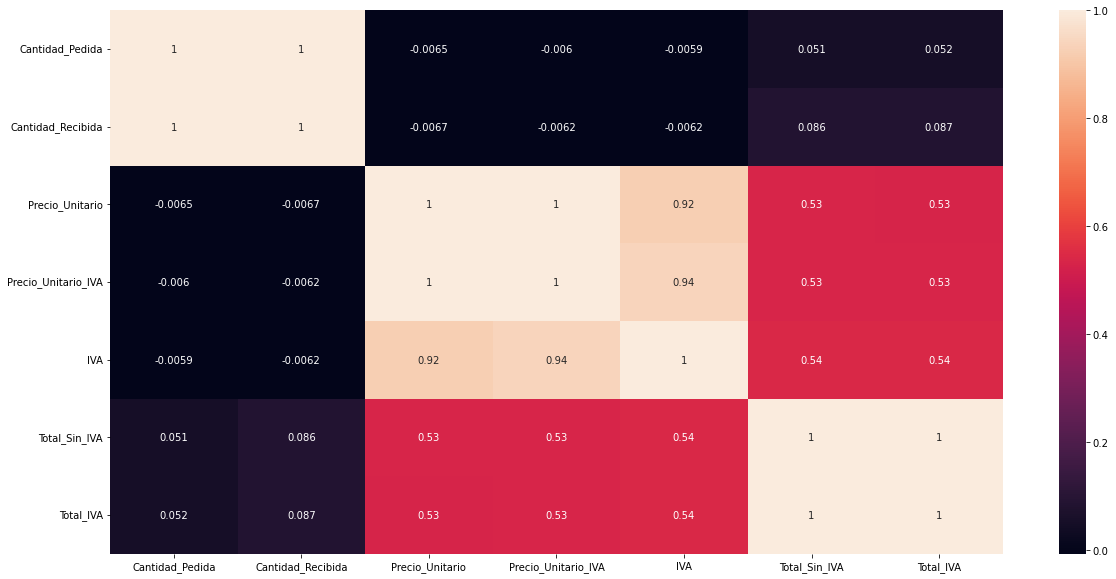

In [11]:
plt.figure(figsize=(20,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()
#plt.savefig("matixdf_full.png")

In [12]:
# campos eliminados despues de revision de matrix de correlacion
df.drop(['Producto_Servicio','Portal','Usuario_Aprobador','Usuario','Subcategoria','Presupuesto',"Precio_Unitario_IVA","Cantidad_Recibida", "Total_Sin_IVA", "IVA", "Codigo_Producto", "Direccion_Facturacion", "Centro_Costos", "Numero_Pedido", "Orden_Numero"], axis=1, inplace = True)

#### Data Cleaning

In [13]:
d3_Cantidad_Pedida = df['Cantidad_Pedida'].mean() + 3*df['Cantidad_Pedida'].std()
d3_Precio_Unitario = df['Precio_Unitario'].mean() + 3*df['Precio_Unitario'].std()
d3_Total_IVA = df['Total_IVA'].mean() + 3*df['Total_IVA'].std()

In [14]:
df = df[(df['Cantidad_Pedida'] < d3_Cantidad_Pedida) & (df['Precio_Unitario'] < d3_Precio_Unitario) &  (df['Total_IVA'] < d3_Total_IVA)]

In [ ]:
profile2 = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile2

In [15]:
df.groupby(["Estado"]).Cantidad_Pedida.describe()

,count,mean,std,min,25%,50%,75%,max
Estado,,,,,,,,
Cancelado,1127.0,45.450311,206.180071,1.00,2.0,4.0,12.00,3000.0
Finalizado Incompleto,934.0,28.777302,139.907961,1.00,1.0,3.0,9.75,2400.0
Recibido,14694.0,34.088079,135.953462,0.27,2.0,5.0,20.00,3000.0
Recibido Parcial,158.0,59.930380,288.872509,1.00,3.0,7.0,16.00,2500.0


In [ ]:
df.groupby(["Estado"]).Precio_Unitario.describe()

#### Feature Engineering

In [ ]:
-Dias_Trasncurridos_Entrega: Fecha Entrega vs Fecha Orden
-Convertir estado: Rechazado a 1 y el resto a 0

In [16]:
df["Dias_Trasncurridos_Entrega"] = (df["Fecha_Entrega"] - df["Fecha_Orden"]).dt.days

In [17]:
df

,Fecha_Orden,Fecha_Entrega,Fecha_Aprobacion,Categoria,Proveedor,Direccion_Pedido,Estado,Cantidad_Pedida,Precio_Unitario,Total_IVA,Fecha_Ultimo_Movimiento,Dias_Trasncurridos_Entrega
1,2021-11-10,2021-11-11,2021-11-10,Mercadeo y publicidad,Proveedor 2,Direccion 1,Recibido,1.0,1476972,1757597,11/10/2021,1.0
4,2021-11-10,2021-11-09,2021-11-10,Imprenta y litografía,Proveedor 5,Direccion 4,Recibido,7.0,92084,76706,11/10/2021,-1.0
12,2021-11-10,2021-11-11,2021-11-10,Mercadeo y publicidad,Proveedor 7,Direccion 7,Recibido,60.0,27,1927800,11/10/2021,1.0
13,2021-11-10,2021-11-23,2021-11-10,"Viajes, Eventos y Entretenimiento",Proveedor 8,Direccion 1,Recibido,6.0,190,1356600,11/10/2021,13.0
34,2021-11-09,2021-11-10,2021-11-09,Servicios Profesionales,Proveedor 17,Direccion 1,Recibido,1.0,1790000,2130100,11/9/2021,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
23078,2018-04-30,NaT,2018-05-01,"Aseo, Cafetería y Oficina",Proveedor 229,Direccion 81,Recibido,8.0,33613,320,5/1/2018,NaN
23079,2018-04-30,NaT,2018-05-01,"Aseo, Cafetería y Oficina",Proveedor 229,Direccion 81,Recibido,1.0,588,700,5/1/2018,NaN
23080,2018-04-30,NaT,2018-05-01,Moda y accesorios,Proveedor 229,Direccion 81,Recibido,3.0,29412,105,5/1/2018,NaN
23081,2018-04-30,NaT,2018-04-30,Moda y accesorios,Proveedor 229,Direccion 81,Recibido,4.0,29412,140,5/1/2018,NaN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16913 entries, 1 to 23082
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Fecha_Orden                 16913 non-null  datetime64[ns]
 1   Fecha_Entrega               16809 non-null  datetime64[ns]
 2   Fecha_Aprobacion            16880 non-null  datetime64[ns]
 3   Categoria                   16913 non-null  object        
 4   Proveedor                   16913 non-null  object        
 5   Direccion_Pedido            16913 non-null  object        
 6   Estado                      16913 non-null  object        
 7   Cantidad_Pedida             16913 non-null  float64       
 8   Precio_Unitario             16913 non-null  int64         
 9   Total_IVA                   16913 non-null  int64         
 10  Fecha_Ultimo_Movimiento     16913 non-null  object        
 11  Dias_Trasncurridos_Entrega  16809 non-null  float64   

In [142]:
df["Estado"].value_counts()

Recibido                 11460
Finalizado Incompleto      800
Cancelado                  636
Recibido Parcial            26
Name: Estado, dtype: int64

In [141]:
df_encoder["Estado_label"].value_counts()

2    11460
1      800
0      636
3       26
Name: Estado_label, dtype: int64

In [20]:
df["Categoria"].value_counts(normalize=True)

Vigilancia y seguridad industrial              0.392479
Alimentos y Bebidas                            0.195234
Aseo, Cafetería y Oficina                      0.176314
Ferreteria                                     0.044108
Dotación y elementos de protección personal    0.039496
Almacenamiento y empaques                      0.018684
Químicos y derivados                           0.017738
Vehículos y repuestos                          0.017324
Construcción y Mantenimiento                   0.013008
Mercadeo y publicidad                          0.011175
Servicios Profesionales                        0.009697
Logística y transporte                         0.009283
Mobiliario y decoración                        0.008810
Textiles                                       0.008514
Eléctricos y Electrónicos                      0.007746
Tecnología e información                       0.007686
Ingeniería e Investigación                     0.004257
Imprenta y litografía                          0

In [21]:
## filtramos el dataset por las categorias mayores al 15%
categorias_si = ['Alimentos y Bebidas','Vigilancia y seguridad industrial','Aseo, Cafetería y Oficina']

df = df[df.Categoria.isin(categorias_si)]

In [841]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17360 entries, 2 to 23082
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Fecha_Orden                 17360 non-null  datetime64[ns]
 1   Fecha_Entrega               13728 non-null  datetime64[ns]
 2   Fecha_Aprobacion            16733 non-null  datetime64[ns]
 3   Categoria                   17360 non-null  object        
 4   Proveedor                   17360 non-null  object        
 5   Direccion_Pedido            17360 non-null  object        
 6   Estado                      17360 non-null  object        
 7   Cantidad_Pedida             17360 non-null  float64       
 8   Precio_Unitario             17360 non-null  int64         
 9   Total_IVA                   17360 non-null  int64         
 10  Fecha_Ultimo_Movimiento     17360 non-null  object        
 11  Dias_Trasncurridos_Entrega  13728 non-null  float64   

In [22]:
df["Categoria"].value_counts()

Vigilancia y seguridad industrial    6638
Alimentos y Bebidas                  3302
Aseo, Cafetería y Oficina            2982
Name: Categoria, dtype: int64

In [33]:
df_encoder = df.copy()

In [34]:
## cambio de variables categoricas con labelencoder
lb_encoder = LabelEncoder()
df_encoder["Categoria_label_encode"] = lb_encoder.fit_transform(df_encoder["Categoria"])
df_encoder["Proveedor_label_encode"] = lb_encoder.fit_transform(df_encoder["Proveedor"])
df_encoder["Direccion_Pedido_label_encode"] = lb_encoder.fit_transform(df_encoder["Direccion_Pedido"])
df_encoder["Estado_label"] = lb_encoder.fit_transform(df_encoder["Estado"])

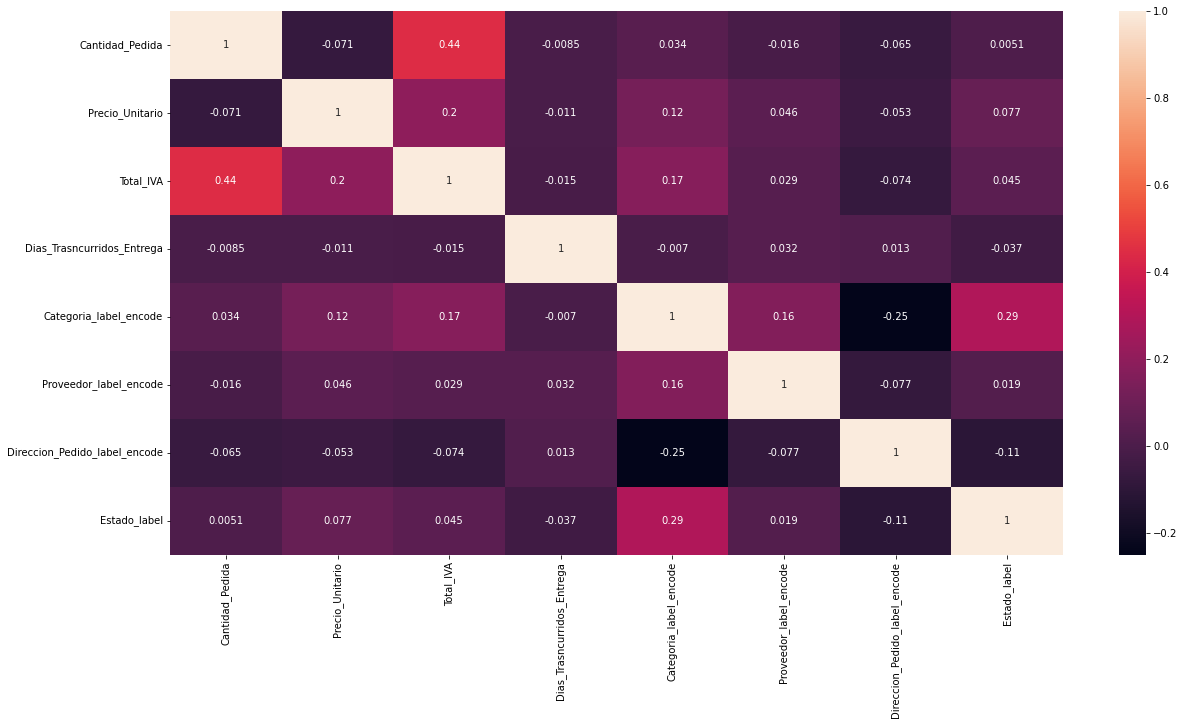

In [35]:
plt.figure(figsize=(20,10))
corr_matrix = df_encoder.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()
#plt.savefig("matixdf_encode.png")

In [26]:
df_encoder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12922 entries, 46 to 23082
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Fecha_Orden                    12922 non-null  datetime64[ns]
 1   Fecha_Entrega                  12860 non-null  datetime64[ns]
 2   Fecha_Aprobacion               12914 non-null  datetime64[ns]
 3   Categoria                      12922 non-null  object        
 4   Proveedor                      12922 non-null  object        
 5   Direccion_Pedido               12922 non-null  object        
 6   Estado                         12922 non-null  object        
 7   Cantidad_Pedida                12922 non-null  float64       
 8   Precio_Unitario                12922 non-null  int64         
 9   Total_IVA                      12922 non-null  int64         
 10  Fecha_Ultimo_Movimiento        12922 non-null  object        
 11  Dias_Trasncurr

In [36]:
##borrado de variables del dataset IDs
df_encoder = df_encoder.drop(['Fecha_Orden','Fecha_Entrega','Fecha_Aprobacion','Categoria','Proveedor','Direccion_Pedido','Estado','Fecha_Ultimo_Movimiento'], axis=1)

In [37]:
df_encoder.describe().T

,count,mean,std,min,25%,50%,75%,max
Cantidad_Pedida,12922.0,25.667585,7.421414e+01,0.27,2.0,5.0,20.0,3000.0
Precio_Unitario,12922.0,25036.689754,5.389045e+04,1.00,650.0,10084.0,31595.0,1464000.0
Total_IVA,12922.0,434564.993499,1.109586e+06,1.00,457.5,17642.5,225299.0,10500000.0
Dias_Trasncurridos_Entrega,12860.0,0.890747,1.133503e+01,-293.00,0.0,0.0,1.0,21.0
Categoria_label_encode,12922.0,1.258164,8.382340e-01,0.00,0.0,2.0,2.0,2.0
Proveedor_label_encode,12922.0,61.375097,2.216922e+01,0.00,57.0,67.0,67.0,105.0
Direccion_Pedido_label_encode,12922.0,63.327890,3.849195e+01,0.00,34.0,77.0,88.0,129.0
Estado_label,12922.0,1.841665,4.855347e-01,0.00,2.0,2.0,2.0,3.0


In [29]:
df_encoder

,Cantidad_Pedida,Precio_Unitario,Total_IVA,Dias_Trasncurridos_Entrega,Categoria_label_encode,Proveedor_label_encode,Direccion_Pedido_label_encode,Estado_label_encode
46,2.0,13,26,0.0,0,65,112,2
105,150.0,7101,1267529,1.0,0,42,78,2
106,150.0,22,3300000,2.0,0,76,78,1
109,6.0,21008,150,0.0,0,47,1,1
110,6.0,59309,423466,0.0,0,47,1,1
...,...,...,...,...,...,...,...,...
23076,3.0,84,300,NaN,2,38,114,2
23077,1.0,84,100,NaN,2,38,114,2
23078,8.0,33613,320,NaN,1,38,114,2
23079,1.0,588,700,NaN,1,38,114,2


In [38]:
#features to X
df_features = df_encoder.loc[:, df_encoder.columns != 'Estado_label']
X = np.asarray(df_features)
X = np.nan_to_num(X)

In [ ]:
# normalizar con min max scaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [39]:
X.shape

(12922, 7)

In [40]:
#labels (target) to y
y = np.asarray(df_encoder['Estado_label'])
y [0:5]

array([2, 2, 1, 1, 1])

In [41]:
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({2: 11460, 1: 800, 0: 636, 3: 26})


In [42]:
# separamo del 80% del train el 10% para validacion  quedando train 70%- test 20% - valid 10%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2,stratify=df_encoder["Estado_label"])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
print ('Valid set:', X_val.shape,  y_val.shape)

Train set: (9303, 7) (9303,)
Test set: (2585, 7) (2585,)
Valid set: (1034, 7) (1034,)


In [43]:
print(len(X_train),Counter(y_train))

9303 Counter({2: 8263, 1: 567, 0: 455, 3: 18})


In [453]:
print(Counter(y_test))

Counter({0: 3361, 1: 111})


In [44]:
# transform the dataset  SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [45]:
counter = Counter(y_train)
print(counter)

Counter({2: 8263, 1: 8263, 0: 8263, 3: 8263})


In [46]:
#develop matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### DecisionTree

In [160]:
#drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4, class_weight="balanced")
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [161]:
drugTree.fit(X_train,y_train)
predTree = drugTree.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.6359767891682785


In [164]:
predTree_proba = drugTree.predict_proba(X_test)

In [173]:
predTree_proba[326]

array([0., 0., 1., 0.])

In [174]:
y_train[326]

2

              precision    recall  f1-score   support

           0       0.16      0.46      0.24       127
           1       0.23      0.50      0.32       160
           2       0.96      0.78      0.86      2293
           3       0.27      0.80      0.40         5

    accuracy                           0.74      2585
   macro avg       0.40      0.63      0.45      2585
weighted avg       0.87      0.74      0.79      2585

Confusion matrix, without normalization
[[  58   30   37    2]
 [  33   80   45    2]
 [ 271  236 1779    7]
 [   0    0    1    4]]


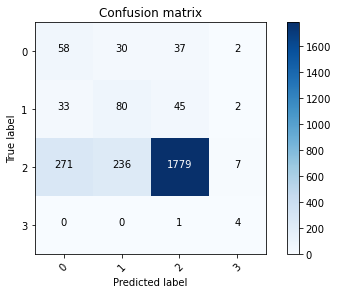

In [85]:
#DT

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predTree, labels = [0,1,2,3])
np.set_printoptions(precision=2)
print (classification_report(y_test, predTree))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = [0,1,2,3], normalize= False,  title='Confusion matrix')
plt.show()

In [ ]:
drugTree.predict_proba[0]

### SVM

In [59]:
#clf = svm.SVC(kernel='rbf', C=3, probability=True, class_weight="balanced")
clf = svm.SVC(kernel='rbf', C=3, probability=True)
clf.fit(X_train, y_train)

SVC(C=3, probability=True)

In [83]:
yhat_SVM = clf.predict(X_test)
pscores_svm = clf.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.06      0.07      0.06       127
           1       0.09      0.20      0.12       160
           2       0.96      0.42      0.58      2293
           3       0.00      1.00      0.01         5

    accuracy                           0.39      2585
   macro avg       0.28      0.42      0.19      2585
weighted avg       0.86      0.39      0.53      2585

Confusion matrix, without normalization
[[  9  32  25  61]
 [ 16  32  13  99]
 [134 307 955 897]
 [  0   0   0   5]]


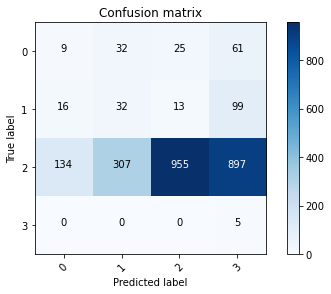

In [84]:
#SVM

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_SVM, labels = [0,1,2,3])
np.set_printoptions(precision=2)
print (classification_report(y_test, yhat_SVM))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = [0,1,2,3], normalize= False,  title='Confusion matrix')
plt.show()

### Logistic Regresion

In [60]:
LR = LogisticRegression(C=0.05, solver='liblinear').fit(X_train,y_train)

In [61]:
yhat_LR = LR.predict(X_test)
pscores_LR = LR.predict_proba(X_test)

In [62]:
f1_score(y_test, yhat_LR, average='weighted')

0.5934574321344688

In [68]:
jaccard_score(y_test, yhat_LR, average='weighted')

0.4355474229780761

C:\Users\d84088661\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\d84088661\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\d84088661\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.09      0.46      0.15       127
           1       0.10      0.49      0.17       160
           2       0.95      0.49      0.65      2293
           3       0.00      0.00      0.00         5

    accuracy                           0.49      2585
   macro avg       0.29      0.36      0.24      2585
weighted avg       0.85      0.49      0.59      2585

Confusion matrix, without normalization
[[  59   39   29    0]
 [  51   79   30    0]
 [ 525  639 1129    0]
 [   3    1    1    0]]


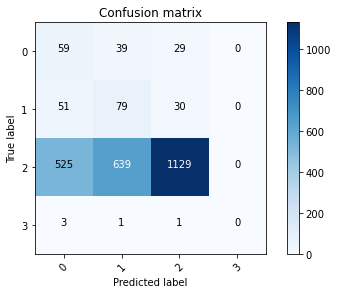

In [86]:
#SVM

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_LR, labels = [0,1,2,3])
np.set_printoptions(precision=2)
print (classification_report(y_test, yhat_LR))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = [0,1,2,3], normalize= False,  title='Confusion matrix')
plt.show()

### KNN 

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks): 
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.79, 0.72, 0.75, 0.7 , 0.7 , 0.67, 0.67, 0.65, 0.65])

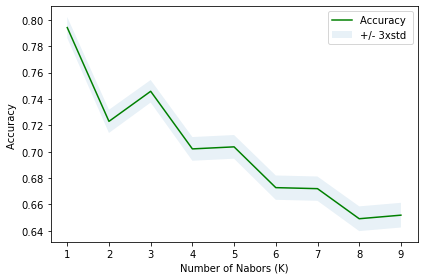

In [70]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [72]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.7941972920696325 with k= 1


In [73]:
k = 3
#Train Model and Predict  
neighKNN = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neighKNN

KNeighborsClassifier(n_neighbors=3)

In [77]:
yhat_KNN = neighKNN.predict(X_test)
#Jaccard
jaccard_KNN=jaccard_score(y_test, yhat_KNN,average='weighted')
#F1-score
f1_KNN=f1_score(y_test, yhat_KNN, average='weighted')

In [78]:
print(jaccard_KNN)
print(f1_KNN)

0.6871130791017973
0.7906746341114099


              precision    recall  f1-score   support

           0       0.14      0.30      0.19       127
           1       0.21      0.35      0.26       160
           2       0.94      0.80      0.86      2293
           3       0.02      0.40      0.04         5

    accuracy                           0.75      2585
   macro avg       0.33      0.46      0.34      2585
weighted avg       0.85      0.75      0.79      2585

Confusion matrix, without normalization
[[  38   25   59    5]
 [  31   56   63   10]
 [ 199  189 1832   73]
 [   0    2    1    2]]


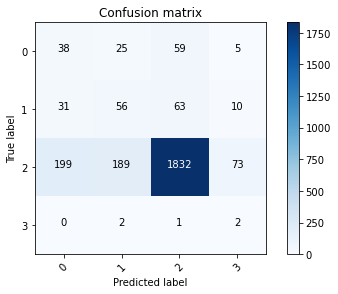

In [87]:
#KNN

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_KNN, labels = [0,1,2,3])
np.set_printoptions(precision=2)
print (classification_report(y_test, yhat_KNN))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = [0,1,2,3], normalize= False,  title='Confusion matrix')
plt.show()

### Arbol de decision 

In [82]:
feature_names = ['Cantidad_Pedida','Precio_Unitario','Total_IVA','Dias_Transcurridos_Entrega','Categoria_label_encode','Proveedor_label_encode', 'Direccion_Pedido_label_encode']
class_names = ['0','1','2','3']
dot_data = tree.export_graphviz(drugTree, out_file=None, filled=True, rounded = True, feature_names=feature_names, class_names=class_names)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

NameError: name 'tree' is not defined

### lightgbm

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2,stratify=df_encoder["Estado_label"])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
print ('Valid set:', X_val.shape,  y_val.shape)

Train set: (9303, 7) (9303,)
Test set: (2585, 7) (2585,)
Valid set: (1034, 7) (1034,)


In [89]:
# transform the dataset  SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [90]:
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [91]:
print(Counter(y_train))

Counter({2: 8263, 1: 8263, 0: 8263, 3: 8263})


In [92]:
## parametros para el modelo lightGBM search 
SEARCH_PARAMS = {'learning_rate': 0.4,
                'max_depth': 15,
                'num_leaves': 32,
                'feature_fraction': 0.8,
                'subsample': 0.2}

FIXED_PARAMS={'objective': 'multiclass',
              'num_class':4,
              'metric': 'multi_logloss',
             'is_unbalance':False,
             'bagging_freq':5,
             'boosting':'dart',
             'num_boost_round':300,
             'early_stopping_rounds':30}


In [93]:
params = {'metric':FIXED_PARAMS['metric'],
             'objective':FIXED_PARAMS['objective'],'num_class':FIXED_PARAMS['num_class'],**SEARCH_PARAMS}

In [94]:
model2 = lgb.train(params, train_data,                     
                     valid_sets=[valid_data],
                     num_boost_round=FIXED_PARAMS['num_boost_round'],
                     early_stopping_rounds=FIXED_PARAMS['early_stopping_rounds'],
                     valid_names=['valid'])

C:\Users\d84088661\Anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.112652 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1784
[LightGBM] [Info] Number of data points in the train set: 33052, number of used features: 7
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[1]	valid's multi_logloss: 0.797774
Training until validation scores don't improve for 30 rounds
[2]	valid's multi_logloss: 0.602903
[3]	valid's multi_logloss: 0.512609
[4]	valid's multi_logloss: 0.457917
[5]	valid's multi_logloss: 0.417428
[6]	valid's multi_logloss: 0.387965
[7]	valid's multi_logloss: 0.36701
[8]	valid's multi_logloss: 0.351757
[9]	valid's multi_logloss: 0.341846
[10]	valid's multi_logloss: 0.337235
[11]	val

In [95]:
## score de test
y_predict_LGBM2 = model2.predict(X_val,num_iteration=model2.best_iteration)

In [96]:
#convert into binary values	
y_predict_LGBM2 = [np.argmax(line) for line in y_predict_LGBM2]

              precision    recall  f1-score   support

           0       0.58      0.57      0.58        54
           1       0.53      0.41      0.46        73
           2       0.94      0.96      0.95       904
           3       1.00      0.33      0.50         3

    accuracy                           0.90      1034
   macro avg       0.76      0.57      0.62      1034
weighted avg       0.89      0.90      0.89      1034

Confusion matrix, without normalization
[[ 31   5  18   0]
 [  5  30  38   0]
 [ 17  21 866   0]
 [  0   1   1   1]]


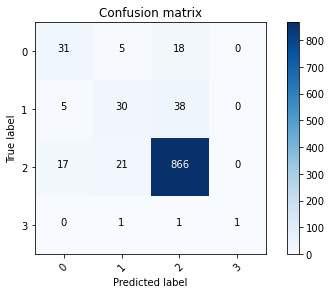

In [98]:
cnf_matrix = confusion_matrix(y_val, y_predict_LGBM2, labels = [0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_val, y_predict_LGBM2))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = [0,1,2,3], normalize= False,  title='Confusion matrix')
plt.show()

### Evaluacion 

In [143]:
columns=['Algorithm','Jaccard','F1-score','LogLoss','Accuracy','Recall','Precision']
matrix=pd.DataFrame([['KNN',0,0,'NA',0,0,0],
                     ['Decision Tree',0,0,'NA',0,0,0],
                     ['SVM',0,0,'NA',0,0,0],
                     ['Logistic Regression',0,0,'NA',0,0,0],
                     ['LightGBM',0,0,'NA',0,0,0],
                     ['LightGBM_OPT',0,0,'NA',0,0,0]],columns=columns)
matrix=matrix.set_index('Algorithm')
matrix

,Jaccard,F1-score,LogLoss,Accuracy,Recall,Precision
Algorithm,,,,,,
KNN,0,0,NA,0,0,0
Decision Tree,0,0,NA,0,0,0
SVM,0,0,NA,0,0,0
Logistic Regression,0,0,NA,0,0,0
LightGBM,0,0,NA,0,0,0
LightGBM_OPT,0,0,NA,0,0,0


### Evaluacion Decision Tree

In [125]:
#loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4).fit(X_val,y_val)
yhat_DT_val=drugTree.predict(X_val)
#pscores_tree_val = drugTree.predict_proba(X_val)
#y_pred_DT_val = pscores_tree_val[:,1]>0.8
#Jaccard
jaccard_DT=jaccard_score(y_val, yhat_DT_val,average='weighted')
#F1-score
f1_DT=f1_score(y_val, yhat_DT_val, average='weighted')
#LogLoss
#logLoss_DT=multi_logloss(y_val, yhat_DT_val)
#accuracy
accuracy_DT=accuracy_score(y_val, yhat_DT_val)
#recall
recall_DT=recall_score(y_val, yhat_DT_val, average='weighted')
#Precision
precision_DT= precision_score(y_val, yhat_DT_val, average='weighted')

### Evaluacion SVM

In [127]:
#loanSVM = svm.SVC(kernel='rbf').fit(X_val,y_val)
yhat_SVM_val = clf.predict(X_val)
#pscores_svm_val = clf.predict_proba(X_val)
#y_pred_SVM_val = pscores_svm_val[:,1]>0.5
#Jaccard
jaccard_SVM=jaccard_score(y_val, yhat_SVM_val,average='weighted')
#F1-score
f1_SVM=f1_score(y_val, yhat_SVM_val, average='weighted')
#LogLoss
#logLoss_SVM=log_loss(y_val, y_pred_SVM_val)
#accuracy
accuracy_SVM=accuracy_score(y_val, yhat_SVM_val)
#recall
recall_SVM=recall_score(y_val, yhat_SVM_val, average='weighted')
#Precision
precision_SVM= precision_score(y_val, yhat_SVM_val, average='weighted')

### Evaluacion de logistic regression 

In [129]:
#loanLR = LogisticRegression(C=0.05, solver='liblinear').fit(X_val,y_val)
yhat_LR_val = LR.predict(X_val)
#pscores_LR_val = LR.predict_proba(X_val)
#y_pred_LR_val = pscores_LR_val[:,1]>0.62
#Jaccard
jaccard_LR=jaccard_score(y_val, yhat_LR_val, average='weighted')
#F1-score
f1_LR=f1_score(y_val, yhat_LR_val, average='weighted')
#LogLoss
#logLoss_LR=log_loss(y_val, y_pred_LR_val)
#accuracy
accuracy_LR=accuracy_score(y_val, yhat_LR_val)
#recall
recall_LR=recall_score(y_val, yhat_LR_val, average='weighted')
#Precision
precision_LR= precision_score(y_val, yhat_LR_val, average='weighted')

C:\Users\d84088661\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Evaluacion KNN

In [138]:
yhat_KNN = neighKNN.predict(X_val)
#Jaccard
jaccard_KNN=jaccard_score(y_val, yhat_KNN,average='weighted')
#F1-score
f1_KNN=f1_score(y_val, yhat_KNN, average='weighted')
#LogLoss
#log_RF=log_loss(y_val, y_pred_forest_val)
#Accuracy
accuracy_KNN=accuracy_score(y_val, yhat_KNN)
#recall
recall_KNN=recall_score(y_val, yhat_KNN, average='weighted')
#Precision
precision_KNN= precision_score(y_val, yhat_KNN, average='weighted')

### Evaluacion LightGBM

In [155]:
y_predict_LGBM2 = model2.predict(X_val,num_iteration=model2.best_iteration)
y_predict_LGBM2 = [np.argmax(line) for line in y_predict_LGBM2]

#Jaccard
jaccard_LGBM=jaccard_score(y_val, y_predict_LGBM2,average='weighted')
#F1-score
f1_LGBM=f1_score(y_val, y_predict_LGBM2, average='weighted')
#LogLoss
#logLoss_LGBM=log_loss(y_val, y_predict_LGBM2)
#Accuracy
accuracy_LGBM=accuracy_score(y_val, y_predict_LGBM2)
#recall
recall_LGBM=recall_score(y_val, y_predict_LGBM2, average='weighted')
#Precision
precision_LGBM= precision_score(y_val, y_predict_LGBM2, average='weighted')

In [175]:
y_predict_LGBM2 = model2.predict(X_val,num_iteration=model2.best_iteration)

In [179]:
y_predict_LGBM2 = [np.argmax(line) for line in y_predict_LGBM2]

In [180]:
y_predict_LGBM2[1]

0

In [159]:
y_val[1]

0

### Evaluacion LighGBM Optimizado Optuna

In [134]:
y_predict_LGBM2 = model2_opt.predict(X_val,num_iteration=model2_opt.best_iteration)
y_predict_LGBM2 = [np.argmax(line) for line in y_predict_LGBM2]
#Jaccard
jaccard_opt=jaccard_score(y_val, y_predict_LGBM2, average='weighted')
#F1-score
f1_opt=f1_score(y_val, y_predict_LGBM2, average='weighted')
#LogLoss
#logLoss_opt=log_loss(y_val, ypred_opt)
#Accuracy
accuracy_opt=accuracy_score(y_val, y_predict_LGBM2)
#recall
recall_opt=recall_score(y_val, y_predict_LGBM2, average='weighted')
#Precision
precision_opt= precision_score(y_val, y_predict_LGBM2, average='weighted')

In [140]:
matrix.at['KNN',['Jaccard','F1-score','Accuracy','Recall','Precision']] = [jaccard_KNN,f1_KNN,accuracy_KNN,recall_KNN,precision_KNN]
matrix.at['Decision Tree',['Jaccard','F1-score','Accuracy','Recall','Precision']] = [jaccard_DT,f1_DT,accuracy_DT,recall_DT,precision_DT]
matrix.at['SVM',['Jaccard','F1-score','Accuracy','Recall','Precision']] = [jaccard_SVM,f1_SVM,accuracy_SVM,recall_SVM,precision_SVM]
matrix.at['Logistic Regression',['Jaccard','F1-score','Accuracy','Recall','Precision']] = [jaccard_LR,f1_LR,accuracy_LR,recall_LR,precision_LR]
matrix.at['LightGBM',['Jaccard','F1-score','Accuracy','Recall','Precision']] = [jaccard_LGBM,f1_LGBM,accuracy_LGBM,recall_LGBM,precision_LGBM]
matrix.at['LightGBM_OPT',['Jaccard','F1-score','Accuracy','Recall','Precision']] = [jaccard_opt,f1_opt,accuracy_opt,recall_opt,precision_opt]
matrix

,Jaccard,F1-score,LogLoss,Accuracy,Recall,Precision
Algorithm,,,,,,
KNN,0.676120,0.783304,NA,0.739845,0.739845,0.846829
Decision Tree,0.682632,0.788940,NA,0.748549,0.748549,0.851051
SVM,0.343729,0.499288,NA,0.363636,0.363636,0.848909
Logistic Regression,0.441749,0.597464,NA,0.498066,0.498066,0.836644
LightGBM,0.831297,0.893110,NA,0.897485,0.897485,0.890889
LightGBM_OPT,0.830624,0.892114,NA,0.895551,0.895551,0.890819


In [ ]:
#KNN
import pickle    
with open('KDD_model.pkl', 'wb') as model_file:
  pickle.dump(neighKNN, model_file)

### Optuna lightGBM MOdel 2

In [101]:
def objective(trial):
    #Split Train - Test. 80%-20%
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2,stratify=df_encoder["Estado_label"])
    # del 80% del test sacamos 10% para validacion queda 72% train 20%  valid 8%
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=2)

   
  
    # transform the dataset  SMOTE
    oversample = SMOTE()
    X_train, y_train = oversample.fit_resample(X_train, y_train)
    dtrain = lgb.Dataset(X_train, label=y_train)
    param = {
        "objective": "multiclass",
        "metric": "multi_logloss",
        'num_class':4,
        "verbosity": -1,
        "boosting_type": "dart",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        }    
        
        
    gbm = lgb.train(param, dtrain)
    preds = gbm.predict(X_test)
    preds = [np.argmax(line) for line in preds]
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(y_test, pred_labels)
    return accuracy
    

In [102]:
study2 = optuna.create_study(direction="maximize")
study2.optimize(objective, n_trials=100)
print("Number of finished trials: {}".format(len(study2.trials)))

print("Best trial:")
trial = study2.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2021-12-05 21:11:27,601] A new study created in memory with name: no-name-b05d43f4-871f-4d09-96d5-42cf8afb8cc2
[I 2021-12-05 21:12:25,857] Trial 0 finished with value: 0.8499032882011606 and parameters: {'lambda_l1': 3.789359254030574e-06, 'lambda_l2': 0.5339475706297199, 'num_leaves': 14, 'feature_fraction': 0.4656813817309302, 'bagging_fraction': 0.9109754661184003, 'bagging_freq': 4, 'min_child_samples': 39}. Best is trial 0 with value: 0.8499032882011606.
[I 2021-12-05 21:13:14,218] Trial 1 finished with value: 0.8762088974854932 and parameters: {'lambda_l1': 4.08190431468739, 'lambda_l2': 8.359954530261282e-07, 'num_leaves': 86, 'feature_fraction': 0.4755890388041438, 'bagging_fraction': 0.7559835994980428, 'bagging_freq': 2, 'min_child_samples': 69}. Best is trial 1 with value: 0.8762088974854932.
[I 2021-12-05 21:14:09,023] Trial 2 finished with value: 0.8862669245647969 and parameters: {'lambda_l1': 1.252887153005746e-05, 'lambda_l2': 4.976908501893619e-08, 'num_leaves': 105

[I 2021-12-05 21:19:32,970] Trial 22 finished with value: 0.893230174081238 and parameters: {'lambda_l1': 0.09424105707764346, 'lambda_l2': 0.0002742513639129356, 'num_leaves': 221, 'feature_fraction': 0.5935696309970021, 'bagging_fraction': 0.5917622297243789, 'bagging_freq': 2, 'min_child_samples': 19}. Best is trial 11 with value: 0.8974854932301741.
[I 2021-12-05 21:19:39,221] Trial 23 finished with value: 0.8920696324951644 and parameters: {'lambda_l1': 0.007404998184338467, 'lambda_l2': 0.0013760565617865201, 'num_leaves': 189, 'feature_fraction': 0.5155036991045152, 'bagging_fraction': 0.6984027556751421, 'bagging_freq': 1, 'min_child_samples': 31}. Best is trial 11 with value: 0.8974854932301741.
[I 2021-12-05 21:19:45,750] Trial 24 finished with value: 0.8924564796905222 and parameters: {'lambda_l1': 0.0009011995127807434, 'lambda_l2': 6.420231150608335e-06, 'num_leaves': 148, 'feature_fraction': 0.6797312990606166, 'bagging_fraction': 0.6744595221005896, 'bagging_freq': 3, 'm

[I 2021-12-05 21:21:39,760] Trial 45 finished with value: 0.893230174081238 and parameters: {'lambda_l1': 0.014898139590301207, 'lambda_l2': 1.0255211669075131e-08, 'num_leaves': 155, 'feature_fraction': 0.6549633365079186, 'bagging_fraction': 0.6633745496253276, 'bagging_freq': 1, 'min_child_samples': 16}. Best is trial 11 with value: 0.8974854932301741.
[I 2021-12-05 21:21:43,880] Trial 46 finished with value: 0.8858800773694391 and parameters: {'lambda_l1': 2.0030183130651302e-08, 'lambda_l2': 9.183007546960224e-05, 'num_leaves': 97, 'feature_fraction': 0.45734704933072357, 'bagging_fraction': 0.49116721736016317, 'bagging_freq': 3, 'min_child_samples': 44}. Best is trial 11 with value: 0.8974854932301741.
[I 2021-12-05 21:21:49,189] Trial 47 finished with value: 0.8893617021276595 and parameters: {'lambda_l1': 0.27246214012404374, 'lambda_l2': 1.2873621180617895e-06, 'num_leaves': 179, 'feature_fraction': 0.4927530827814409, 'bagging_fraction': 0.5461429605344315, 'bagging_freq': 1

[I 2021-12-05 21:23:59,351] Trial 68 finished with value: 0.8889748549323018 and parameters: {'lambda_l1': 1.0270117980040216, 'lambda_l2': 2.9289718169424876, 'num_leaves': 153, 'feature_fraction': 0.4249506002159005, 'bagging_fraction': 0.9299590625619882, 'bagging_freq': 5, 'min_child_samples': 11}. Best is trial 11 with value: 0.8974854932301741.
[I 2021-12-05 21:24:05,485] Trial 69 finished with value: 0.8905222437137331 and parameters: {'lambda_l1': 0.20378934967558104, 'lambda_l2': 0.4876320185868021, 'num_leaves': 173, 'feature_fraction': 0.4553729770298968, 'bagging_fraction': 0.9729775653843744, 'bagging_freq': 4, 'min_child_samples': 12}. Best is trial 11 with value: 0.8974854932301741.
[I 2021-12-05 21:24:12,112] Trial 70 finished with value: 0.8947775628626693 and parameters: {'lambda_l1': 0.058141504901147514, 'lambda_l2': 0.16762260693423908, 'num_leaves': 186, 'feature_fraction': 0.5092474967998203, 'bagging_fraction': 0.8455397847954201, 'bagging_freq': 3, 'min_child_s

[I 2021-12-05 21:26:14,706] Trial 91 finished with value: 0.8947775628626693 and parameters: {'lambda_l1': 0.008764365000714428, 'lambda_l2': 0.051098278854130645, 'num_leaves': 191, 'feature_fraction': 0.5581908118063607, 'bagging_fraction': 0.9891078397153765, 'bagging_freq': 7, 'min_child_samples': 20}. Best is trial 11 with value: 0.8974854932301741.
[I 2021-12-05 21:26:20,661] Trial 92 finished with value: 0.8955512572533849 and parameters: {'lambda_l1': 0.016902343253168438, 'lambda_l2': 0.10169651879917987, 'num_leaves': 202, 'feature_fraction': 0.5004094215072877, 'bagging_fraction': 0.9558145209313077, 'bagging_freq': 7, 'min_child_samples': 16}. Best is trial 11 with value: 0.8974854932301741.
[I 2021-12-05 21:26:27,130] Trial 93 finished with value: 0.8963249516441005 and parameters: {'lambda_l1': 4.050194136630334e-08, 'lambda_l2': 0.024485064385581404, 'num_leaves': 186, 'feature_fraction': 0.6170180678259823, 'bagging_fraction': 0.9855075501318169, 'bagging_freq': 6, 'min

Number of finished trials: 100
Best trial:
  Value: 0.8974854932301741
  Params: 
    lambda_l1: 3.351610838383845e-08
    lambda_l2: 9.263411621971444e-05
    num_leaves: 185
    feature_fraction: 0.6026657835557594
    bagging_fraction: 0.6040938235913128
    bagging_freq: 1
    min_child_samples: 5


### validacion modelo LightGBM Optimizado

In [103]:
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [113]:
## parametros para el modelo lightGBM search 
SEARCH_PARAMETROS = {'learning_rate': 0.4,
                'max_depth': 15,
                #'num_leaves': 32,
                #'feature_fraction': 0.8,
                'subsample': 0.2}

FIXED_PARAMETROS={'objective': 'multiclass',
             'metric': 'multi_logloss',
             'num_class':4,
             "verbosity": -1,
             'is_unbalance':False,
             'bagging_freq':1,
             'boosting':'dart',
             'num_boost_round':300,
             "lambda_l1":3.351610838383845e-08,
             "lambda_l2":9.263411621971444e-05,
             "num_leaves":185,
             "feature_fraction":0.6026657835557594,
             "bagging_fraction":0.6040938235913128,
             "bagging_freq":1,
             "min_child_samples":5,
             'early_stopping_rounds':30}


In [114]:
params = {'metric':FIXED_PARAMETROS['metric'],
             'objective':FIXED_PARAMETROS['objective'],'num_class':FIXED_PARAMETROS['num_class'],**SEARCH_PARAMETROS}

In [115]:
model2_opt = lgb.train(params, train_data,                     
                     valid_sets=[valid_data],
                     num_boost_round=FIXED_PARAMS['num_boost_round'],
                     early_stopping_rounds=FIXED_PARAMS['early_stopping_rounds'],
                     valid_names=['valid'])

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000996 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1784
[LightGBM] [Info] Number of data points in the train set: 33052, number of used features: 7
[LightGBM] [Info] Start training from score -1.386294
[Ligh

In [116]:
## score de test
y_predict_LGBM2 = model2_opt.predict(X_val,num_iteration=model2_opt.best_iteration)

In [117]:
#convert into binary values	
y_predict_LGBM2 = [np.argmax(line) for line in y_predict_LGBM2]

              precision    recall  f1-score   support

           0       0.53      0.57      0.55        54
           1       0.53      0.41      0.46        73
           2       0.94      0.96      0.95       904
           3       1.00      0.33      0.50         3

    accuracy                           0.90      1034
   macro avg       0.75      0.57      0.62      1034
weighted avg       0.89      0.90      0.89      1034

Confusion matrix, without normalization
[[ 31   5  18   0]
 [  8  30  35   0]
 [ 19  21 864   0]
 [  0   1   1   1]]


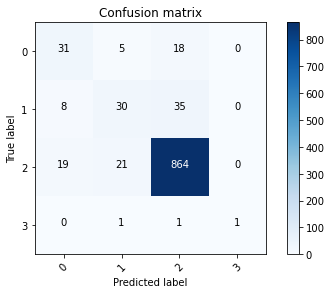

In [118]:
cnf_matrix = confusion_matrix(y_val, y_predict_LGBM2, labels = [0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_val, y_predict_LGBM2))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = [0,1,2,3], normalize= False,  title='Confusion matrix')
plt.show()

### tabla 3 mejores modelos

In [152]:
columns=['Algorithm','F1-score','Accuracy','Recall','Precision']
matrix=pd.DataFrame([['KNN',0,0,0,0],
                     ['Decision Tree',0,0,0,0],
                     ['LightGBM',0,0,0,0]],columns=columns)
matrix=matrix.set_index('Algorithm')
matrix

,F1-score,Accuracy,Recall,Precision
Algorithm,,,,
KNN,0,0,0,0
Decision Tree,0,0,0,0
LightGBM,0,0,0,0


In [153]:
matrix.at['KNN',['F1-score','Accuracy','Recall','Precision']] = [f1_KNN,accuracy_KNN,recall_KNN,precision_KNN]
matrix.at['Decision Tree',['F1-score','Accuracy','Recall','Precision']] = [f1_DT,accuracy_DT,recall_DT,precision_DT]
matrix.at['LightGBM',['F1-score','Accuracy','Recall','Precision']] = [f1_LGBM,accuracy_LGBM,recall_LGBM,precision_LGBM]
matrix

,F1-score,Accuracy,Recall,Precision
Algorithm,,,,
KNN,0.783304,0.739845,0.739845,0.846829
Decision Tree,0.788940,0.748549,0.748549,0.851051
LightGBM,0.893110,0.897485,0.897485,0.890889


### Exporte del Modelo

In [181]:
import joblib
filename = r"C:\Users\d84088661\model_LGBM.pkl"
joblib.dump(model2, filename)

['C:\\Users\\d84088661\\model_LGBM.pkl']